In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer 
from keras import regularizers
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score,make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn import svm
from sklearn.metrics import classification_report

import pickle
pickle.dump(classifier_linear, open('models/classifier.sav', 'wb'))
pickle.dump(vectorizer, open('models/vectorizer.sav', 'wb'))


FileNotFoundError: [Errno 2] No such file or directory: 'models/classifier.sav'

In [2]:
#read in csv file
df = pd.read_csv('Resources/machine_learning.csv')

In [3]:
df.head(2)

,retailer_id,retailer_name,retailer_sku,Title,Brand,Category,Subcategory,week_id,week_ending,review_date,...,is_verified,has_response,review_text,review_title,reviews_url,Reviewer,combined_text,target,review_breakout,review_length
0,1,Amazon.com,B0735Q681B,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,...,1,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs,Pretty good rubbers. Great for pounding and ...,1,"['pretti', 'good', 'rubber', 'pound', 'kind', ...",11
1,1,Amazon.com,B00WX0RJVS,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,...,1,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina,They are good out of the whole box i did hav...,1,"['good', 'whole', 'two', 'rip', 'good']",5


# Train Test Split

In [4]:
#declare inputs and target - analyzing to see if the time of year, brand, subcategory and review length impact ratings
inputs=df[['review_breakout','week_ending', 'Brand','Subcategory', 'review_length']]
target=df['target']

In [5]:
#train test split dataset 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)
x_train.head()

,review_breakout,week_ending,Brand,Subcategory,review_length
268,"['cant', 'feel', 'vibrat', 'batteri', 'last', ...",9/3/2022,LifeStyles,Sex Toys,11
1074,"['tight', 'keep', 'eye', 'size', 'condom', 'or...",1/1/2022,SKYN,Condoms,9
406,"['use', 'year', 'buy', 'new', 'pack', 'start',...",7/30/2022,SKYN,Condoms,55
554,"['ladi', 'wast', 'ur', 'money', 'know', 'price...",6/18/2022,SKYN,Performance Enhancers & Stimulants,31
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4


In [6]:
# join all strings together for each row 
review_train=pd.DataFrame(data=[' '.join(x) for x in x_train['review_breakout']])
review_test=pd.DataFrame(data=[' '.join(x) for x in x_test['review_breakout']])

# Check to see if data needs to be resampled

<AxesSubplot: xlabel='review_stars', ylabel='count'>

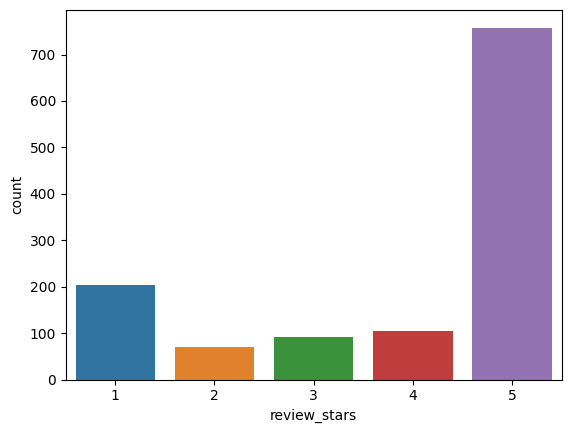

In [7]:
sns.countplot(x='review_stars', data=df)

# Resampling

In [8]:
# concatenate our training data back together
training  = pd.DataFrame()
training[list(x_train.columns)]=x_train
training['target']=y_train
training.head()


,review_breakout,week_ending,Brand,Subcategory,review_length,target
268,"['cant', 'feel', 'vibrat', 'batteri', 'last', ...",9/3/2022,LifeStyles,Sex Toys,11,0
1074,"['tight', 'keep', 'eye', 'size', 'condom', 'or...",1/1/2022,SKYN,Condoms,9,0
406,"['use', 'year', 'buy', 'new', 'pack', 'start',...",7/30/2022,SKYN,Condoms,55,0
554,"['ladi', 'wast', 'ur', 'money', 'know', 'price...",6/18/2022,SKYN,Performance Enhancers & Stimulants,31,0
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4,1


In [9]:
# separate minority and majority classes
negative_review= training[training.target==0]
positive_review= training[training.target==1]

In [10]:
# Get a class count to understand the class imbalance.
print('negative review count: '+ str(len(negative_review)))
print('positive review count: '+ str(len(positive_review)))

negative review count: 287
positive review count: 696


In [11]:
# upsample minority
negative_upsampled = resample(negative_review,
                          replace=True, # sample with replacement
                          n_samples=len(positive_review), # match number in majority class
                          random_state=23) # reproducible results
negative_upsampled.head()

,review_breakout,week_ending,Brand,Subcategory,review_length,target
95,"['seriou', 'infect', 'use', 'go', 'doctor', 'b...",10/22/2022,SKYN,Condoms,12,0
865,"['debería', 'un', 'poco', 'má', 'ancho', 'larg...",3/12/2022,SKYN,Condoms,43,0
1186,"['dri', 'quick', 'leav', 'sticki', 'feel', 'st...",11/27/2021,SKYN,Sex Lubricants,10,0
743,"['perfectli', 'fine', 'condom', ""'re"", 'suppos...",4/16/2022,SKYN,Condoms,22,0
234,"['feel', 'stud', 'thick', 'cheap', 'feel']",9/17/2022,SKYN,Condoms,5,0


In [12]:
# upsample minority
def upsample(minority):
    df= resample(minority,replace=True, # sample with replacement
                  n_samples=len(rating_5), # match number in majority class
                   random_state=23) # reproducible results
    return df

In [13]:
# combine majority and upsampled minority
upsampled= pd.concat([positive_review, negative_upsampled])

# check new class counts
upsampled.target.value_counts()

1    696
0    696
Name: target, dtype: int64

In [14]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [15]:
x_train.head()

,review_breakout,week_ending,Brand,Subcategory,review_length
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4
254,"['yeah', 'excus', 'man', 'wear', 'thing', 'lov...",9/10/2022,SKYN,Condoms,8
58,['latex'],10/29/2022,SKYN,Condoms,1
869,"['feel', 'real', 'thing', 'work', 'advertis']",3/5/2022,SKYN,Condoms,5
390,"['feel', 'smooth', 'thin', 'smooth']",8/6/2022,SKYN,Condoms,4


# Vectorize

In [16]:
train_text=["".join(x) for x in x_train['review_breakout']]
test_text=["".join(x) for x in x_test['review_breakout']]

In [17]:
vectorizer=CountVectorizer()

In [18]:
X_trainc=vectorizer.fit_transform(train_text).todense()
X_testc=vectorizer.transform(test_text).todense()

In [19]:

def history_model(X_train, y_train,X_test, y_test):
    #Before we build our model, we need to know the input dimension of our feature vectors.
    input_dim = X_train.shape[1] 
    # Add layers one by one in order 
    random.seed(123)
    model = Sequential()
    model.add(keras.layers.Dense(10, input_dim=input_dim, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    opt = SGD(lr=0.01, momentum=0.9)
    #specify the optimizer and the loss function.
    model.compile(loss='binary_crossentropy', 
                  optimizer=opt, 
                  metrics=['accuracy'])

    #Give an overview of the model and the number of parameters available for training:
    model.summary()
    # # fit the model
    history = model.fit(X_train, y_train,epochs=50, verbose=1,
                    validation_data=(X_test, y_test),batch_size=70)
    return history, model

In [20]:
def nn_result_prediction(X_train, y_train,X_test, y_test,model):
    # obtian Accuracies for train data and test data
    loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=False)
    
    loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=False)
    
    #prediction
    nn_train_pre=model.predict_classes(X_train)
    nn_test_pre=model.predict_classes(X_test)

    # calculate f1 scores for test data and train data 
    nn_f1_score_test=f1_score(y_test,nn_test_pre)
    nn_f1_score_train=f1_score(y_train,nn_train_pre)

    
    return nn_train_pre,nn_test_pre

In [21]:
historyc, modelc=history_model(X_trainc, y_train,X_testc, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20400     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 20,411
Trainable params: 20,411
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/Users/kaseymathues/miniforge3/envs/PythonData/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


20/20 [==============================] - 1s 17ms/step - loss: 0.6842 - accuracy: 0.5654 - val_loss: 0.6767 - val_accuracy: 0.6220
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.7162 - val_loss: 0.6342 - val_accuracy: 0.7114
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5876 - accuracy: 0.7953 - val_loss: 0.5936 - val_accuracy: 0.7724
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.8247 - val_loss: 0.5563 - val_accuracy: 0.7805
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 0.8477 - val_loss: 0.5254 - val_accuracy: 0.7805
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4383 - accuracy: 0.8678 - val_loss: 0.4980 - val_accuracy: 0.7764
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8750 - val_loss: 0.4702 - val_accuracy: 0.8130
Epoch 8/50
20/20 [============

<AxesSubplot: >

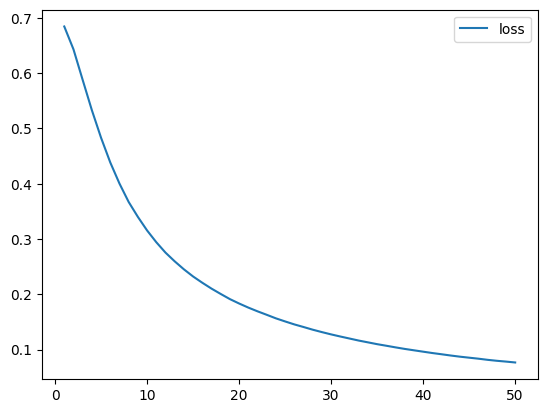

In [22]:
history_df = pd.DataFrame(historyc.history)
history_df.index +=1
history_df.plot(y="loss")

<AxesSubplot: >

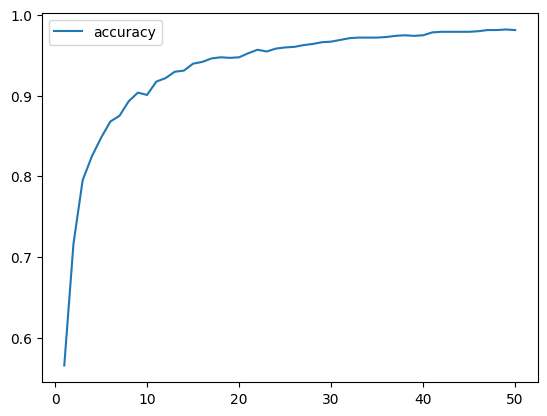

In [23]:
history_df.plot(y="accuracy")

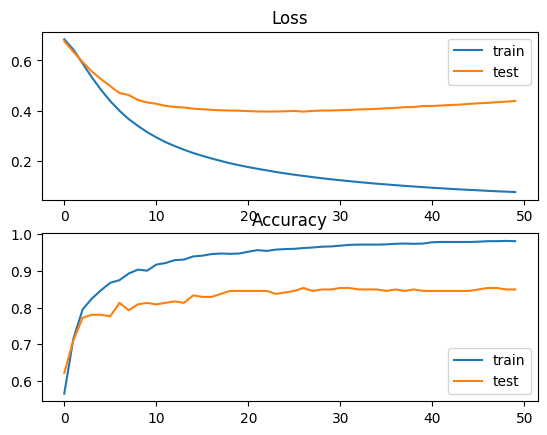

In [24]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(historyc.history['loss'], label='train')
plt.plot(historyc.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(historyc.history['accuracy'], label='train')
plt.plot(historyc.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [25]:
accuracy = historyc,modelc.evaluate(X_testc, y_test, verbose=False)
print(f"Accuracy: {accuracy}")

Accuracy: (<keras.callbacks.History object at 0x28d4eed60>, [0.43889090418815613, 0.8495935797691345])


# LOGISTIC REGRESSION

In [26]:
X= df['review_breakout']
Y= df['target']

In [27]:
cv = CountVectorizer()
X = cv.fit_transform(df['review_breakout'])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [29]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (983, 2312)
Size of y_train:  (983,)
Size of x_test:  (246, 2312)
Size of y_test:  (246,)


In [30]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.59%


In [31]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 50  21]
 [ 12 163]]


              precision    recall  f1-score   support

           0       0.81      0.70      0.75        71
           1       0.89      0.93      0.91       175

    accuracy                           0.87       246
   macro avg       0.85      0.82      0.83       246
weighted avg       0.86      0.87      0.86       246



# Naive Bayes Classifier 1

In [32]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 82.93%


In [33]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[ 48  23]
 [ 19 156]]


              precision    recall  f1-score   support

           0       0.72      0.68      0.70        71
           1       0.87      0.89      0.88       175

    accuracy                           0.83       246
   macro avg       0.79      0.78      0.79       246
weighted avg       0.83      0.83      0.83       246



# SVM MODEL

In [3]:
df = pd.read_csv('Resources/machine_learning.csv')
#declare inputs and target - analyzing to see if the time of year, brand, subcategory and review length impact ratings
inputs=df[['review_breakout','week_ending', 'Brand','Subcategory', 'review_length']]
target=df['target']

In [4]:
#train test split dataset 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)
x_train.head()

,review_breakout,week_ending,Brand,Subcategory,review_length
268,"['cant', 'feel', 'vibrat', 'batteri', 'last', ...",9/3/2022,LifeStyles,Sex Toys,11
1074,"['tight', 'keep', 'eye', 'size', 'condom', 'or...",1/1/2022,SKYN,Condoms,9
406,"['use', 'year', 'buy', 'new', 'pack', 'start',...",7/30/2022,SKYN,Condoms,55
554,"['ladi', 'wast', 'ur', 'money', 'know', 'price...",6/18/2022,SKYN,Performance Enhancers & Stimulants,31
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4


In [5]:
# concatenate our training data back together
training  = pd.DataFrame()
training[list(x_train.columns)]=x_train
training['target']=y_train
training.head()

,review_breakout,week_ending,Brand,Subcategory,review_length,target
268,"['cant', 'feel', 'vibrat', 'batteri', 'last', ...",9/3/2022,LifeStyles,Sex Toys,11,0
1074,"['tight', 'keep', 'eye', 'size', 'condom', 'or...",1/1/2022,SKYN,Condoms,9,0
406,"['use', 'year', 'buy', 'new', 'pack', 'start',...",7/30/2022,SKYN,Condoms,55,0
554,"['ladi', 'wast', 'ur', 'money', 'know', 'price...",6/18/2022,SKYN,Performance Enhancers & Stimulants,31,0
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4,1


In [6]:
# separate minority and majority classes
negative_review= training[training.target==0]
positive_review= training[training.target==1]

In [7]:
# Get a class count to understand the class imbalance.
print('negative review count: '+ str(len(negative_review)))
print('positive review count: '+ str(len(positive_review)))

negative review count: 287
positive review count: 696


In [8]:
# upsample minority
negative_upsampled = resample(negative_review,
                          replace=True, # sample with replacement
                          n_samples=len(positive_review), # match number in majority class
                          random_state=23) # reproducible results
negative_upsampled.head()

,review_breakout,week_ending,Brand,Subcategory,review_length,target
95,"['seriou', 'infect', 'use', 'go', 'doctor', 'b...",10/22/2022,SKYN,Condoms,12,0
865,"['debería', 'un', 'poco', 'má', 'ancho', 'larg...",3/12/2022,SKYN,Condoms,43,0
1186,"['dri', 'quick', 'leav', 'sticki', 'feel', 'st...",11/27/2021,SKYN,Sex Lubricants,10,0
743,"['perfectli', 'fine', 'condom', ""'re"", 'suppos...",4/16/2022,SKYN,Condoms,22,0
234,"['feel', 'stud', 'thick', 'cheap', 'feel']",9/17/2022,SKYN,Condoms,5,0


In [9]:
# upsample minority
def upsample(minority):
    df= resample(minority,replace=True, # sample with replacement
                  n_samples=len(rating_5), # match number in majority class
                   random_state=23) # reproducible results
    return df

In [10]:
# combine majority and upsampled minority
upsampled= pd.concat([positive_review, negative_upsampled])

# check new class counts
upsampled.target.value_counts()

1    696
0    696
Name: target, dtype: int64

In [11]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [12]:
x_train.head()

,review_breakout,week_ending,Brand,Subcategory,review_length
270,"['realli', 'good', 'get', 'amaz']",9/3/2022,SKYN,Condoms,4
254,"['yeah', 'excus', 'man', 'wear', 'thing', 'lov...",9/10/2022,SKYN,Condoms,8
58,['latex'],10/29/2022,SKYN,Condoms,1
869,"['feel', 'real', 'thing', 'work', 'advertis']",3/5/2022,SKYN,Condoms,5
390,"['feel', 'smooth', 'thin', 'smooth']",8/6/2022,SKYN,Condoms,4


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train['review_breakout'])
test_vectors = vectorizer.transform(x_test['review_breakout'])
#train_vectors.size
#test_vectors.size

In [14]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors,y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print(report)
print("\n")
print('positive: ', report['1'])
print("\n")
print('negative: ', report['0'])

Training time: 0.095185s; Prediction time: 0.009969s
{'0': {'precision': 0.7073170731707317, 'recall': 0.7341772151898734, 'f1-score': 0.7204968944099378, 'support': 79}, '1': {'precision': 0.8719512195121951, 'recall': 0.8562874251497006, 'f1-score': 0.8640483383685801, 'support': 167}, 'accuracy': 0.8170731707317073, 'macro avg': {'precision': 0.7896341463414633, 'recall': 0.7952323201697871, 'f1-score': 0.7922726163892589, 'support': 246}, 'weighted avg': {'precision': 0.8190809042236764, 'recall': 0.8170731707317073, 'f1-score': 0.817948484414382, 'support': 246}}


positive:  {'precision': 0.8719512195121951, 'recall': 0.8562874251497006, 'f1-score': 0.8640483383685801, 'support': 167}


negative:  {'precision': 0.7073170731707317, 'recall': 0.7341772151898734, 'f1-score': 0.7204968944099378, 'support': 79}


In [15]:
review = """SUPERB, I AM IN LOVE"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

[1]


In [16]:
review = """do not"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

[0]
